In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Boosting.TreeBoost import SimpleTreeBoostRegressor
from metrics import mse, accuracy, error
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


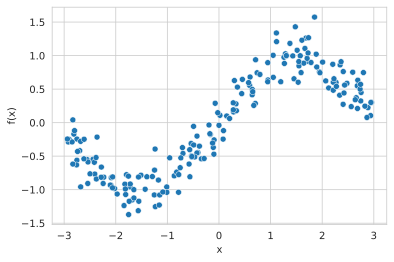

In [65]:
SIZE = 200

noise = np.random.normal(0, 0.2, size=SIZE)
x = np.random.uniform(-3, 3, size=SIZE)
y = np.sin(x)
df = pd.DataFrame(columns=['x', 'f(x)'])
df['x'] = x
df['f(x)'] = y + noise
sns.scatterplot(data=df, x = 'x', y = 'f(x)')
plt.show()

In [66]:
model = SimpleTreeBoostRegressor(n_estimators=30, metric=mse, derivative=error, max_depth=4, colsample_bytree=1.0, criterion='entropy', subsample=0.99, minimize=True, debug=False, lr=0.1)
model.fit(df, target='f(x)')
model.predict(df, predict_col='pred')

Iteration: 0, Loss: 1.5643705169316477

Iteration: 1, Loss: 1.2927382548929114

Iteration: 2, Loss: 1.0557976083462046

Iteration: 3, Loss: 0.8562189811072486

Iteration: 4, Loss: 0.7090351389135091

Iteration: 5, Loss: 0.578977364647581

Iteration: 6, Loss: 0.47328818416170276

Iteration: 7, Loss: 0.3951982209232622

Iteration: 8, Loss: 0.32221826881357607

Iteration: 9, Loss: 0.2732130907085975

Iteration: 10, Loss: 0.2278407323265815

Iteration: 11, Loss: 0.19138041258028618

Iteration: 12, Loss: 0.16359704348291926

Iteration: 13, Loss: 0.14095915285279748

Iteration: 14, Loss: 0.12195697840604876

Iteration: 15, Loss: 0.10503281230667964

Iteration: 16, Loss: 0.09223229966316669

Iteration: 17, Loss: 0.083176985747952

Iteration: 18, Loss: 0.07328125310598539

Iteration: 19, Loss: 0.0682756162985554

Iteration: 20, Loss: 0.06315524766201341

Iteration: 21, Loss: 0.056982912860587646

Iteration: 22, Loss: 0.05443809686343737

Iteration: 23, Loss: 0.05194442648457124

Iteration: 24,

<AxesSubplot:xlabel='x', ylabel='pred'>

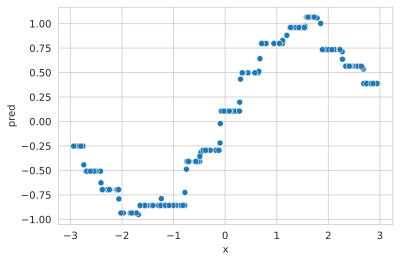

In [67]:
sns.scatterplot(data = df, x = 'x', y = 'pred')

In [68]:
# from Trees.Tree import TreeRegressor
# model = TreeRegressor(max_depth=10, metric=mse, criterion='entropy', minimize=True)
# model.trivial_fit(df, target='f(x)')
# model.predict(df, 'pred f(x)')


In [69]:
df

,x,f(x),pred
0,1.574572,0.997623,1.066461
1,-2.441131,-0.547364,-0.507937
2,-2.752966,-0.561348,-0.251661
3,0.602571,0.680816,0.497337
4,-1.253166,-1.078688,-0.858457
...,...,...,...
195,-0.778993,-0.775191,-0.725349
196,-2.612501,-0.247845,-0.507937
197,-0.490032,-0.333394,-0.357079
198,-2.381511,-0.520451,-0.696772
